In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.duplicated().sum()

1081

In [6]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

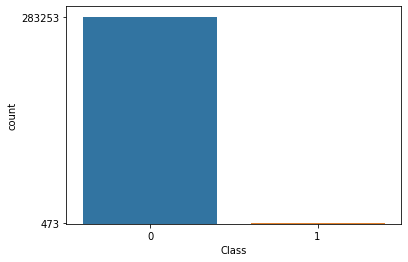

In [7]:
#check if output is unbalanced
# Visualize
sns.countplot(data=df,x='Class')
f=df['Class'].value_counts()
plt.yticks(f)
plt.show()

In [9]:
# Assign Input & Output from the dataset for further prediction
X = df.drop('Class',axis=1) # input
Y = df['Class'] # Output

In [10]:
# Here we see that 0' & 1' value have major difference as the data is unbalanced
# Let's Random Over Sampler we will run the data and check the output for better result

In [15]:
#First split the data for training and testing
# Using train_test_split method we will split the data for training and testing the model
from sklearn.model_selection import train_test_split

In [16]:
# Let's split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a class for StandardScaler & Run for Test_train
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
# To balance the data we will use RandomOverSampler
# Lets Import the class of random over sampler
from imblearn.over_sampling import RandomOverSampler

In [20]:
# Create a class for random over sampler
ros=RandomOverSampler()

In [21]:
# Let's Fit the randomOverSampler with X_train & Y_train
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [22]:
# Rechecking
Y_train_ros.value_counts()

0    198260
1    198260
Name: Class, dtype: int64

In [23]:
# lets fit test 
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [24]:
# Rechecking
Y_test_ros.value_counts()

0    84993
1    84993
Name: Class, dtype: int64

In [25]:
#Apply Support Vector Machine (SVM)
#SVM : Support vector machine 
#There are different types of SVM : -
'''
1. Linear Separatable data means Linear Kernal function
2.  Non -Linear data
1. Polynomial Kernal function    2. radial basis kernel function
'''

'\n1. Linear Separatable data means Linear Kernal function\n2.  Non -Linear data\n1. Polynomial Kernal function    2. radial basis kernel function\n'

In [26]:
#1. Linear Separable data means Linear Kernal
from sklearn.svm import LinearSVC 

In [27]:
svc=LinearSVC(random_state=1) #by default hard margin, supposing there are no outliers in dataset
#we are supposing that there is no overfitting issue

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
#create a user defined function
def create_model(model):
    model.fit(X_train_ros,Y_train_ros)
    Y_pred=model.predict(X_test_ros)
    print(classification_report(Y_test_ros,Y_pred))
    print(confusion_matrix(Y_test_ros,Y_pred))
    return model

In [42]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     84993
           1       0.98      0.87      0.92     84993

    accuracy                           0.93    169986
   macro avg       0.93      0.93      0.93    169986
weighted avg       0.93      0.93      0.93    169986

[[83363  1630]
 [10784 74209]]


In [ ]:
#here recall score is 0.87 which is good but we will try for a higher score
#means can be possible ,model is overfit  why 
#perhaps , can be no error on training time but error on testing time , 
#what  do we do ,
#add some external error during training time  if create a object of 
#LinearSVC class 

#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
#Soft Margin

In [43]:
svc1=LinearSVC(random_state=1, C=0.9) #soft margin

#here C is parameter which is used to add some error during training

In [44]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     84993
           1       0.98      0.87      0.92     84993

    accuracy                           0.93    169986
   macro avg       0.93      0.93      0.93    169986
weighted avg       0.93      0.93      0.93    169986

[[83381  1612]
 [10784 74209]]


In [ ]:
#score has increased to 0.72 but its not tht good
#we will aim for higher score

In [ ]:
#use polynomial Kernel function : It is used for Non-Linearly data
#In polynomial Kernal function, increase the dimension means to increase low
#dimension to high dimension

In [45]:
# Use polynomial kernal function
from sklearn.svm import SVC

#svc used for polynomial and radial based kernal functions: both are used for non-linear function

In [47]:
#create object of SVC class and pass the poly in kernal parameter
svc1=SVC(random_state=1, kernel='poly')

In [48]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     84993
           1       1.00      0.79      0.88     84993

    accuracy                           0.89    169986
   macro avg       0.91      0.89      0.89    169986
weighted avg       0.91      0.89      0.89    169986

[[84803   190]
 [18231 66762]]


In [49]:
#score is 0.79 its good but we want a better score
#so give dataset in radial based function=rbf
svc2=SVC(random_state=1, kernel='rbf')

In [50]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     84993
           1       0.99      0.84      0.91     84993

    accuracy                           0.92    169986
   macro avg       0.93      0.92      0.92    169986
weighted avg       0.93      0.92      0.92    169986

[[84162   831]
 [13516 71477]]


In [51]:
#conclusion: credit card dataset is a non-linear dataset (radial basis kernel function)
#as we got the highest score through rbf of 99%